In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')




In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv', index_col=0)
display(customer_df)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [3]:
X = pd.get_dummies(customer_df.drop(['Customer Lifetime Value'], axis=1))
y = customer_df['Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.1514408479972611
MAE: 3994.358286078899
RMSE: 6612.977234164297


<Axes: xlabel='Customer Lifetime Value'>

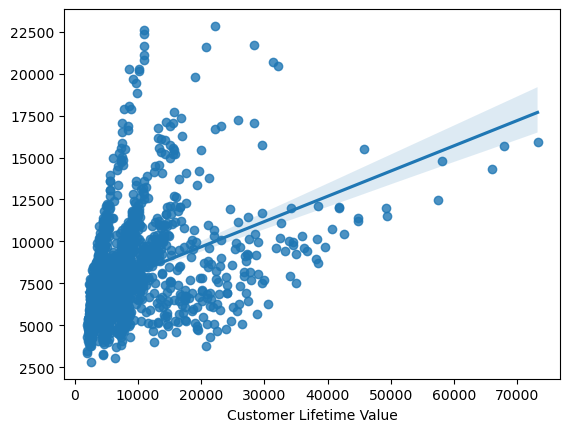

In [4]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [5]:
# Separation of the variables from the target
X = pd.get_dummies(customer_df.drop(['Customer Lifetime Value'], axis=1))
y = np.log1p(customer_df['Customer Lifetime Value'])

# Separation of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# List the transformations to apply
transformations = [None, StandardScaler(), Normalizer()]

# Initialisation of the model
lr = LinearRegression()

for trans in transformations:
    if trans is None:
        name = "Original"
        lr.fit(X_train, y_train)
    else:
        # Creation of a pipeline 
        name = trans.__class__.__name__
        pipe = Pipeline([('transformer', trans), ('estimator', lr)])
        pipe.fit(X_train, y_train)

    # Prediction and calculations
    y_pred = pipe.predict(X_test) if trans else lr.predict(X_test)
    print(f"{name}:")
    print("\tR2:", r2_score(y_test, y_pred))
    print("\tMAE:", mean_absolute_error(y_test, y_pred))
    print("\tRMSE:", mean_squared_error(y_test, y_pred, squared=False))


Original:
	R2: 0.2607797185760635
	MAE: 0.44571476602823384
	RMSE: 0.572027519985149
StandardScaler:
	R2: 0.25891647224964676
	MAE: 0.4458621709799753
	RMSE: 0.5727479800611972
Normalizer:
	R2: 0.04765095943573083
	MAE: 0.5136337006947944
	RMSE: 0.6492740723589989


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_and_test_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': mean_squared_error(y_test, y_pred, squared=False)
        }
    return results

In [7]:
# Définir the model to test
models_to_test = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'MLPRegressor': MLPRegressor(max_iter=500)
}

# Train and test the model
results = train_and_test_models(models_to_test, X_train, y_train, X_test, y_test)

# display the results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")

LinearRegression:
	R2: 0.2607797185760635
	MAE: 0.44571476602823384
	RMSE: 0.572027519985149
KNeighborsRegressor:
	R2: 0.053832472762699535
	MAE: 0.49089677306346224
	RMSE: 0.6471634857518768
MLPRegressor:
	R2: -0.6150480798819868
	MAE: 0.5864179367504264
	RMSE: 0.8455177204232617


***Discussion of Results***

**LinearRegression:**

R2: 0.26 indicates that the model explains about 26% of the variance in the data. This is not a very good score, but it's the best among the three models tested.
MAE: 0.45 and RMSE: 0.57 are relatively low, which is good, but there's room for improvement.

**KNeighborsRegressor:**

R2: 0.05 is quite low, indicating that the model only explains 5% of the variance.
MAE: 0.49 and RMSE: 0.65 are higher than for linear regression, which is not ideal.

**MLPRegressor:**

R2: -0.61 is very poor. A negative R2 indicates that the model is worse than a model that would simply predict the mean of the target variable.
MAE: 0.59 and RMSE: 0.85 are the highest among the models, which is also not good.
Conclusions
Best Model: Linear Regression appears to be the best model among those tested, although its performance is not excellent.

Possible Improvements: we might consider other data preprocessing techniques, hyperparameter tuning, or even trying other types of models to improve performance.

MLPRegressor: The poor result could be due to a lack of hyperparameter tuning, or perhaps the model is too complex for this dataset.

In summary, it looks like we have more work to do to get a high-quality model. We might consider going back to the data preprocessing stage or trying other models and techniques.